In [243]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [244]:
train_df = pd.read_csv('train.csv')
train_lab = train_df['label']
train_X = train_df.loc[:, train_df.columns != 'label']

In [245]:
test_X = pd.read_csv('test.csv')

In [246]:
#imports done, now reshape the array to form the images
size = 28

train_X.shape

(42000, 784)

In [247]:
train_X = train_X.to_numpy()

In [248]:
train_X = train_X.reshape([train_X.shape[0], size, size, 1])

In [249]:
test_X = test_X.to_numpy().reshape([test_X.shape[0], size, size, 1])

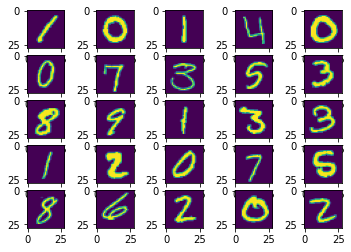

In [250]:
#get array of images, plot 'max' number of images...
max = 5
for i in range(max**2):
    plt.subplot(max, max, i+1)
    plt.imshow(train_X[i])

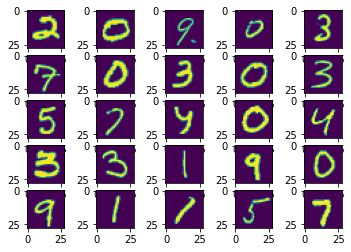

In [251]:
max = 5
for i in range(max**2):
    plt.subplot(max, max, i+1)
    plt.imshow(test_X[i])

In [252]:
#normalizing pixel values
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

trainX = train_X/.255
test_X = test_X/.255

In [253]:
def history_plotter(history):
    '''Plots training information over epochs
    Arguments: 1) history: history data obtained after training
    Returns: None
    '''
    epochs = len(history.epoch)
    epoch_range = range(epochs)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_acc, label = 'Training Accuracy')
    plt.plot(epoch_range, val_acc, label = "Validation Accuracy")
    plt.legend(loc = "lower right")

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label = "Training Loss")
    plt.plot(epoch_range, val_loss, label = "Validation Loss")
    plt.legend(loc = "lower right")
    plt.show()

In [254]:
t_X, val_X, lab_t, lab_val = train_test_split(train_X, train_lab, test_size = 0.1, random_state= 42)

In [255]:
model = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation((-0.2, 0.2), fill_mode = 'constant', seed = 5432, input_shape = (28,28,1)),
    # tf.keras.layers.RandomZoom(0.2, fill_mode = 'constant', seed = 1234),


    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((3,3)),

    tf.keras.layers.Conv2D(128, (5,5), activation = 'relu', padding = 'same', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((5,5)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

#history = model.fit(t_X, lab_t, batch_size= 512, validation_data = (val_X, lab_val), validation_batch_size=256, shuffle = True, epochs = 50)

In [256]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 9, 9, 128)         204928    
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 1, 1, 128)        0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 128)               0         
                                                                 
 dense_91 (Dense)            (None, 512)             

In [257]:
layers = model.layers
layers

In [258]:
model.fit(train_X, train_lab, epochs = 50, batch_size = 512, shuffle = True)

Epoch 1/50
83/83 [==============================] - 1s 11ms/step - loss: 4.5584 - accuracy: 0.6591
Epoch 2/50
83/83 [==============================] - 1s 10ms/step - loss: 0.2002 - accuracy: 0.9392
Epoch 3/50
83/83 [==============================] - 1s 10ms/step - loss: 0.1123 - accuracy: 0.9660
Epoch 4/50
83/83 [==============================] - 1s 11ms/step - loss: 0.0854 - accuracy: 0.9735
Epoch 5/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0679 - accuracy: 0.9792
Epoch 6/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 7/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0678 - accuracy: 0.9793
Epoch 8/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0372 - accuracy: 0.9886
Epoch 9/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 10/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0240 - accuracy: 0.9933
Epoch 11/

In [259]:
preds = model.predict(test_X)
preds = np.argmax(preds, axis = 1)

875/875 [==============================] - 1s 1ms/step


In [260]:
ans = pd.DataFrame(preds)

In [261]:
ans.reset_index()

,index,0
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3
...,...,...
27995,27995,9
27996,27996,7
27997,27997,3
27998,27998,9


In [262]:
ans.index+=1

In [263]:
ans = ans.reset_index()


In [264]:
ans.columns = ['ImageId','Label']

In [265]:
ans.to_csv("submission.csv", index = False)